# Social Computing/Social Gaming - Summer 2020

# Exercise Sheet 2 - Centrality Measures
Centrality is a key concept in social network analysis. It measures the importance or influence of a certain node/edge in a network. The interpretation of importance or influence, however, depends on the type of centrality and the application for which it is measured. Different types of centrality were discussed in the lecture: degree centrality, closeness centrality, betweenness centrality and eigenvector centrality.<br>
In this exercise, you are going to implement different centrality algorithms using the NetworkX library which you already know from last exercise. Please consult the [reference](https://networkx.github.io/documentation/stable/reference/index.html) and the [tutorial](https://networkx.github.io/documentation/stable/tutorial.html).

In [1]:
# import the libraries:
import networkx as nx, pandas as pd, matplotlib.pyplot as plt

## Task 2.1: The Krackhardt Kite Graph
We will use the Krackhardt Kite for the first exercise. [This figure](https://en.wikipedia.org/wiki/Krackhardt_kite_graph#/media/File:Krackhard_kite.PNG) illustrates the Krackhardt Kite.

**1.** **Calculate the degree centrality of the Krackhardt Kite graph - just a list of ten values, one for each node. You can use the pre-defined function of the NetworkX library.**

Degree centrality:
node0: 4			node1: 4			node2: 3			node3: 6			node4: 3			node5: 5			node6: 5			node7: 3			node8: 2			node9: 1


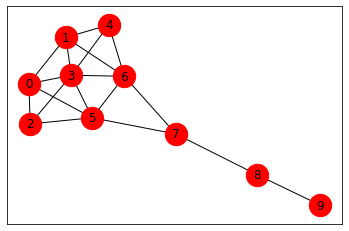

In [2]:
# Importing the graph (connected, unweighted, undirected social network)
krackhardt_kite = nx.krackhardt_kite_graph()

# Formatting the graph
nodeColor = "red"
nodeSize = 500
pos = nx.spring_layout(krackhardt_kite)

# TODO: Calculate and print the Kite's degree centrality
kk_degree_centrality = [node_degree_tup[1] for node_degree_tup in krackhardt_kite.degree]
print('Degree centrality:')
print('\t\t\t'.join([f'node{i}: {dc}' for i, dc in enumerate(kk_degree_centrality)]))

# TODO: Plot the graph
nx.draw_networkx(krackhardt_kite, pos=pos, node_size=nodeSize, node_color=nodeColor)

**Optional:** Look at the graph and the list with the degree centrality values. Can you identify which node has which degree centrality?<br>
*Answer*: Yes, the graph is a simple undirected graph and node label is the index of each degree centrality list. Therefore we can figure out the degree centrality of each node simply by counting the number of neighbors each node has. 

**Optional:** Calculate the closeness and betweeness centrality as well. What information do they give us?

In [3]:
kk_closeness_centrality = nx.closeness_centrality(krackhardt_kite)
print('Closeness centrality:')
print('\t\t\t'.join([f'node{i}: {round(cc, 6)}' for i, cc in kk_closeness_centrality.items()]))

Closeness centrality:
node0: 0.529412			node1: 0.529412			node2: 0.5			node3: 0.6			node4: 0.5			node5: 0.642857			node6: 0.642857			node7: 0.6			node8: 0.428571			node9: 0.310345


**Observation**: With closeness centrality, node 3, 5, 6 are still the one have the largest centralities as in the case of degree centrality. However, node 7 becomes more important (as important as node 3, which has the most neighbors) as it can reach all other nodes within 2 hops. 

In [4]:
kk_betweenness_centrality = nx.betweenness_centrality(krackhardt_kite)
print('Betweenness centrality:')
print('\t\t\t'.join([f'node{i}: {round(cc, 6)}' for i, cc in kk_betweenness_centrality.items()]))

Betweenness centrality:
node0: 0.023148			node1: 0.023148			node2: 0.0			node3: 0.101852			node4: 0.0			node5: 0.231481			node6: 0.231481			node7: 0.388889			node8: 0.222222			node9: 0.0


**Observation**: Node 2, 4, 9 have the betweenness centrality of 0.0 since they do not lie on any shortest path of any pairs of nodes. For example, node 0 can go directly to node 5 without transitting through node 0. In constrast, node 7 now has the largest centrality. This is understandable since node 7 plays as a bottleneck connecting 2 components of the graph, between the head and the tail of the "kite".  

## Task 2.2: Degree Centrality
In the following three problems, you are working with an anonymized real-life social network from [1] represented in the file _UniversityNetwork.graphml_. It represents the faculty of a university, consisting of individuals (vertices) and their directed and weighted connections (edges). The nodes have attributes (which faculty the person is affiliated with), but we will neglect that information. The edges' weights are a measure of friendship between the persons.

**1.** **Your task in this exercise is to read in the graph and to calculate the degree centrality of all the nodes in it. Plot the graph as well.** You are **not allowed** to use the pre-defined function `degree_centrality()` but have to implement your own. The output should be a list of integers - nodes with a centrality of 0 do not need to be listed, but can be. 

**Notes:**
* Degree centrality of a graph node is the number of edges (incoming and outgoing) of that node.
* The functions `read_graphml()` and `has_edge(v, w)` might help you with the task.
* You can check your result for correctness using the function of the NetworkX library.
* Be aware that you have to normalize your results. Look it up how it is done in the NetworkX documentation, in order to achieve the same results as using the function of the NetworkX library.


node0: 15,	node1: 36,	node2: 8,	node3: 18,	node4: 38,	node5: 17,	node6: 35,	node7: 8,	node8: 13,	node9: 35,	node10: 2,	node11: 19,	node12: 26,	node13: 12,	node14: 29,	node15: 19,	node16: 14,	node17: 22,	node18: 24,	node19: 21,	node20: 38,	node21: 20,	node22: 22,	node23: 9,	node24: 13,	node25: 20,	node26: 37,	node27: 12,	node28: 62,	node29: 10,	node30: 35,	node31: 10,	node32: 27,	node33: 17,	node34: 28,	node35: 10,	node36: 54,	node37: 21,	node38: 20,	node39: 19,	node40: 12,	node41: 29,	node42: 33,	node43: 6,	node44: 12,	node45: 30,	node46: 12,	node47: 14,	node48: 26,	node49: 20,	node50: 24,	node51: 39,	node52: 10,	node53: 26,	node54: 11,	node55: 10,	node56: 24,	node57: 25,	node58: 11,	node59: 5,	node60: 16,	node61: 43,	node62: 9,	node63: 13,	node64: 10,	node65: 8,	node66: 6,	node67: 27,	node68: 37,	node69: 18,	node70: 13,	node71: 19,	node72: 4,	node73: 13,	node74: 14,	node75: 13,	node76: 44,	node77: 6,	node78: 22,	node79: 15,	node80: 10


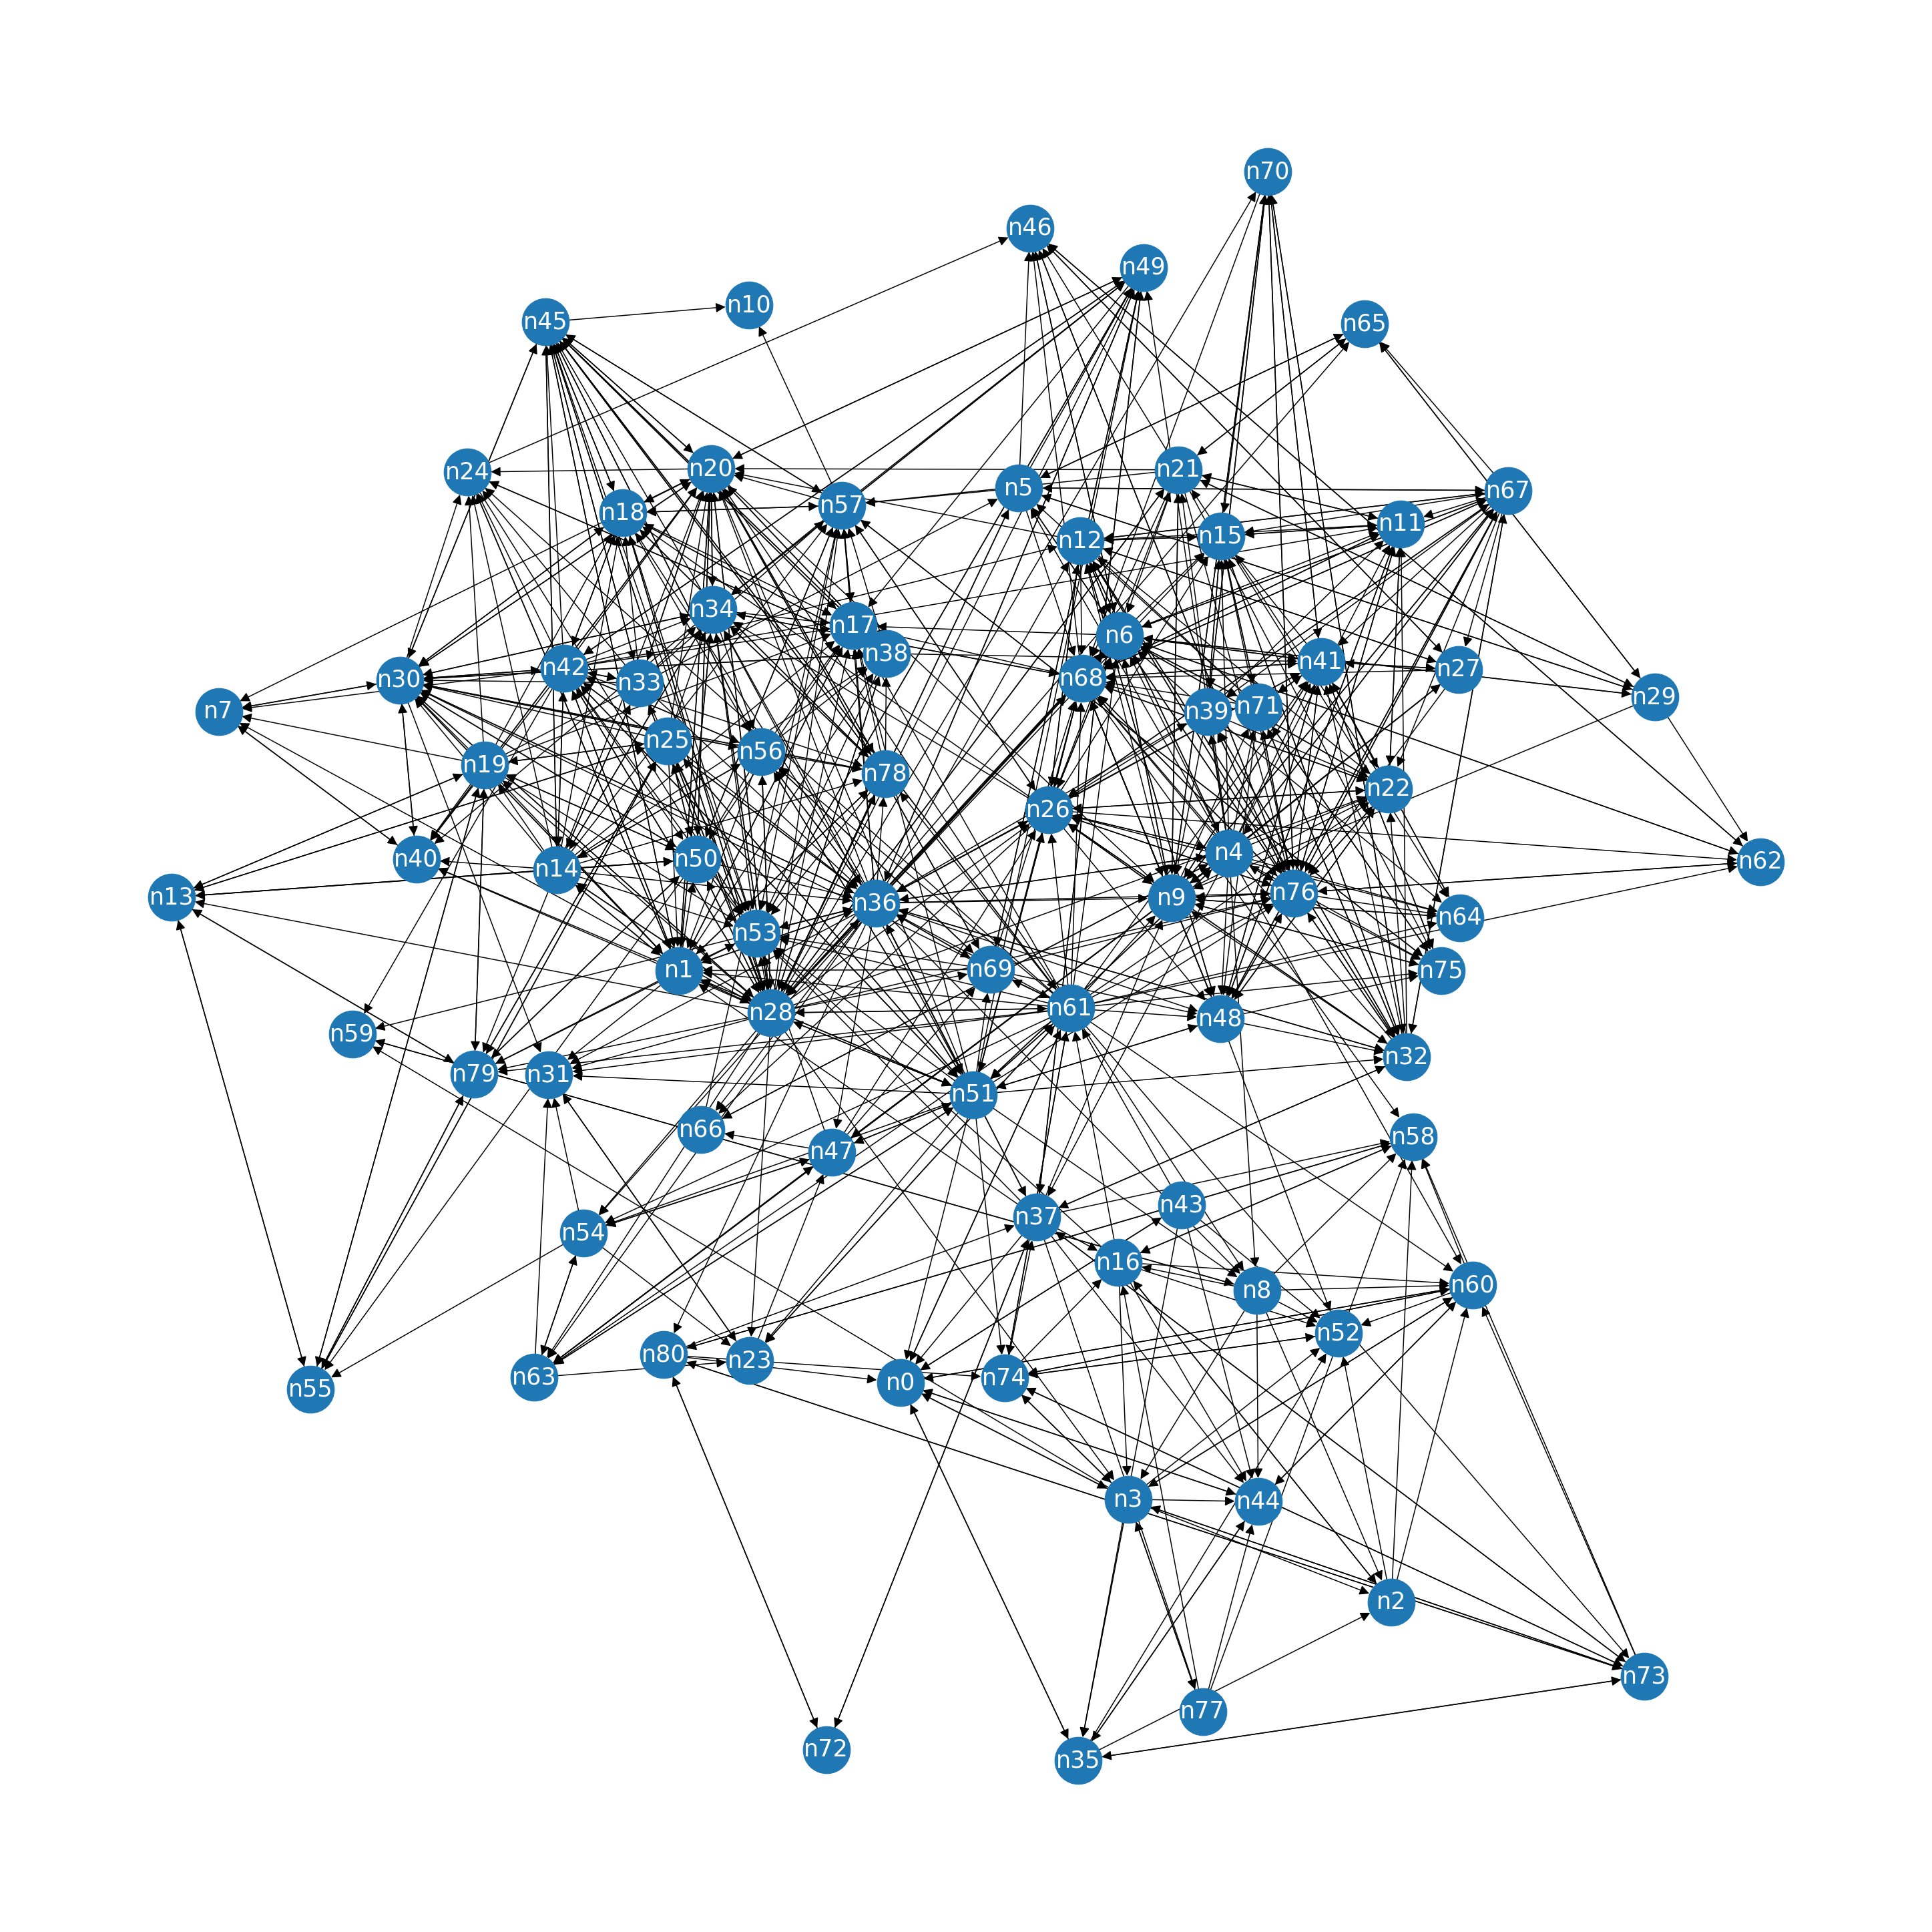

In [5]:
# TODO: Implement the degree centrality for a graph g
def degree_centrality(g):
    return [node_degree_tup[1] for node_degree_tup in g.degree()]


# TODO: Import the graph
uni_net = nx.read_graphml('UniversityNetwork.graphml.xml')

# Formatting the graph
visual_style = {
    'vertex_size': 10,
    'margin': 50,
    'vertex_label': uni_net.nodes,
    'with_labels': True
}

visual_style2 = {
    'vertex_size': 5000,
    'edge_width': 1.5,
    'with_labels': True,
    'font_size': 35
}

# TODO: Calculate and print the degree centrality using the degree_centrality function
deg_cen = degree_centrality(uni_net)
print(',\t'.join([f'node{i}: {dc}' for i, dc in enumerate(deg_cen)]))


norm_const = 1.0 / (len(deg_cen) - 1.0)
deg_cen_normalized = [deg * norm_const for deg in deg_cen]

# check the correctness of our degree centralities 
assert deg_cen_normalized == list(nx.degree_centrality(uni_net).values())

# TODO: Plot the graph with the kamada kawai layout
plt.figure(1,figsize=(40,40))
nx.draw_kamada_kawai(uni_net, 
                 node_size=visual_style2['vertex_size'],
                     width=visual_style2['edge_width'],
                 with_labels=visual_style2['with_labels'],
                font_size=visual_style2['font_size'],
                    font_color='white',
                    arrowsize = 30)

## Task 2.3: Betweenness Centrality

Betweenness centrality also measures centrality based on shortest paths. For every pair of vertices in a graph, there exists a shortest path between the vertices such that either the number of edges that the path passes through (for undirected graphs) or the edges' sum of the weights (for directed graphs) is minimized.<br>
Vertices with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.

**1.** **Calculate the betweenness centrality with the help of the pre-defined function in the NetworkX library. Interpret the resulting values based on two exemplary nodes.** To do that, pick two nodes and explain how their betweenness centrality links to the graph structure. Name the two nodes that you discussed (and their betweenness centrality). Do not write more than 5 sentences.

In [6]:
# TODO: Calculate the betweenness centrality 
#      (using the pre-defined function is fine)
btw_cen = nx.betweenness_centrality(uni_net)
print('\nBetweeness Centrality:')
print(',\t'.join([f'{n}: {round(bc, 7)}' for n, bc in btw_cen.items()]))


Betweeness Centrality:
n0: 0.0477541,	n1: 0.0374997,	n2: 0.0006297,	n3: 0.0281145,	n4: 0.0522414,	n5: 0.0179621,	n6: 0.0467505,	n7: 0.0,	n8: 0.0287984,	n9: 0.0412813,	n10: 0.0,	n11: 0.0021682,	n12: 0.0132916,	n13: 0.00071,	n14: 0.003203,	n15: 0.0021881,	n16: 0.0529859,	n17: 0.0033299,	n18: 0.004608,	n19: 0.0087015,	n20: 0.0361261,	n21: 0.0205641,	n22: 0.0025113,	n23: 0.0155793,	n24: 0.0039373,	n25: 0.0232215,	n26: 0.037938,	n27: 0.0009055,	n28: 0.1655618,	n29: 0.0012992,	n30: 0.0293224,	n31: 0.0005408,	n32: 0.0244393,	n33: 0.0006807,	n34: 0.0109977,	n35: 0.0017013,	n36: 0.1155334,	n37: 0.0686791,	n38: 0.0049956,	n39: 0.002031,	n40: 0.0005397,	n41: 0.013759,	n42: 0.0114689,	n43: 3.96e-05,	n44: 0.0019029,	n45: 0.0196725,	n46: 0.0035045,	n47: 0.0089972,	n48: 0.0179713,	n49: 0.0124134,	n50: 0.0180063,	n51: 0.0583691,	n52: 0.0015709,	n53: 0.0111154,	n54: 0.0047512,	n55: 0.0020844,	n56: 0.005032,	n57: 0.0249453,	n58: 0.0074972,	n59: 0.0005477,	n60: 0.0068475,	n61: 0.1738556,	n62: 0.000753,	

**TODO: Write your observations here:**
- **Node 10** has **0.0** betweeness centrality because it does not have any outgoing edge and thus is a dead end of the graph, once we reach there, we cannot go further.

- In contrast, **Node 61** has the largest betweeness centrality of **0.1738556**. We can see that it lies in the middle of graph and all of its incomming edges come from nodes of the top-left counter-clockwise to the bottom-right of the graph, and all of its outgoing edges go to the other half of the graph, from bottom-right counter-clockwise to top-left. This indicates that node 61 lies on many shortest paths connecting the lower part of the graph to its upper part as well as connecting the dense subnet at the top-left of the graph to the other dense subnet at the top-right. For this reason, it is not surprising that the probability of node 61 involved in communication between many pairs of nodes via their short paths is the highest. 



## Task 2.4: PageRank

In this task we will introduce you to the PageRank centrality. It is a feedback-centrality named after Larry Page, who together with Sergei Brin founded Google. The PageRank algorithm was used in Googles search engine to rank the pages for the search result. Since 2013 PageRank was superseeded by the Hummingbird algorithm. Although PageRank remains one of many ingredients in the Hummingbird algorithm. Its basic idea is that a node is more central the more central its neighbors are.

You will first use the built-in function to calculate the PageRank. Then, you will have to implement the pagerank using `Jacobi power iteration` .

**1.** Your first task is to: 
- create a graph using ``erdos_renyi_graph`` function of NetworkX
- print the first 10 elements of the PageRank, using the built in function of NetworkX.

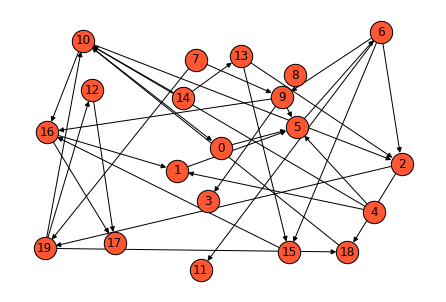

In [7]:
##### Create a graph using Erdos_Renyi with the following parameters
n = 20
p = 0.07
directed = True

# TODO:
g = nx.erdos_renyi_graph(n, p, directed=directed)

# Formatting the graph
node_color = "#FF5733"
edge_colors = "#000000"
node_size = 500

pos = nx.spring_layout(g, k=0.7, iterations=1)

nx.draw(g, pos=pos, node_color=node_color, node_size=node_size, edgecolors=edge_colors, with_labels=True)

**2.** Use the built-in function to calculate the PageRank.

In [8]:
# Use these values for the following function
ITERATIONS = 100
DAMPING = 0.85

# TODO: 
pagerank = nx.pagerank(g, alpha=DAMPING, max_iter=ITERATIONS)
#print the first 10 elements of the PageRank, using the built in function of NetworkX.
print('\nFirst 10 elements of PageRank:')
print('\n'.join([f'node{n}: {pr}' for n, pr in pagerank.items()][:10]))


First 10 elements of PageRank:
node0: 0.038741576607386655
node1: 0.05603631472913237
node2: 0.0701972274781613
node3: 0.02617228547978931
node4: 0.014007843621905314
node5: 0.11070178408712207
node6: 0.10810557930767628
node7: 0.014007843621905314
node8: 0.014007843621905314
node9: 0.04293333413890431


**3.** Now create a simple PageRank function using Jacobi power iteration, which you can find in the lecture slides. To avoid matrix inversion we use an iterative formula for the PageRank algorithm:

$$c_i^{(k+1)} = d \cdot \sum_{j} P_{ij}c_{j}^{(k)} + \frac{(1 - d)}{N}$$

where the superscript k denotes the iteration index, d the damping, N the number of nodes in our graph (which is left out in the lecture notes and also in the original papers, but is used in the built-in PageRank calculation algorithm of NetworkX).

Your next task is to implement a function which calculates the transition matrix element $P_{ij}$


In [9]:
# Calculate the transition matrix element P_ij of a node i to a node j.
def pij(g, i, j):
    """
    calculate transition matrix element
    between node i and node j of graph g
    returns:
        1/"outdegree of node j",  if edge (j,i) exists
        0,                        otherwise
    """
    # TODO:
    if g.has_edge(j, i):
        deg_out_j = len(g.adj[j])
        return 1.0 / deg_out_j
    return 0

**4.** Now normalize a list, so that `sum(list) = 1.0` after every iteration in the Jacobi power iteration algorithm.

In [10]:
# Renormalize after every step
def renormalize(pagerank_list):
    """
    input arbitrary float number list
    return a list where of all elements (sum(list)) equals 1.0
    """
    # TODO:
    return [float(pr) / sum(pagerank_list) for pr in pagerank_list]

**5.** The last task is to implement the PageRank calculation using Jacobi power iteration. Print the first 10 elements and check if you have the same results as in task *2.4.1.*

**Note:**
- `summe_j` is the term $\sum_j P_{ij}c_{j}^{k}$ in the formula

In [11]:
def calcPageRank(g, d, numIter=3):
    """
    calculate the PageRank of a given graph g, with damping d,
    number of iterations numIter using jacobi power iteration
    return a list with pageranks.
    """
    # first initialize our pagerank centrality list c
    # with 1/N for each element
    N = len(g.nodes)
    c = [1.0 / N] * N  # TODO
    for iteration in range(numIter):

        c_previous = c.copy()

        for i in g.nodes:
            summe_j = 0.0

            for j in g.nodes:  # for neighbors of i
                # calculate the sum term
                summe_j += c_previous[j] * pij(g, i, j)  # TODO

            # calculate the centrality for the index i
            # using the complete formula
            c[i] = d * summe_j + (1.0 - d) / N  # TODO
        # renormalize pageranks after every iteration
        c = renormalize(c)

    return c

my_pagerank_list = calcPageRank(g, DAMPING, ITERATIONS)
pagerank_dict = nx.pagerank(g, alpha=DAMPING, max_iter=ITERATIONS)

# You can use this to compare your results to the pre-defined function.
# Please note that the results may vary by approx. 0.01. That is ok.
# This is because NetworkX uses slightly different variation.
for i in range(10):
    nx_pr = pagerank_dict[i]
    my_pr = my_pagerank_list[i]
    print(f"node{i}: {nx_pr:.6f} - {my_pr:.6f} (eps={abs(nx_pr - my_pr):.6f})")

node0: 0.038742 - 0.037636 (eps=0.001106)
node1: 0.056036 - 0.057433 (eps=0.001397)
node2: 0.070197 - 0.073682 (eps=0.003485)
node3: 0.026172 - 0.022378 (eps=0.003794)
node4: 0.014008 - 0.008576 (eps=0.005431)
node5: 0.110702 - 0.117564 (eps=0.006862)
node6: 0.108106 - 0.122848 (eps=0.014743)
node7: 0.014008 - 0.008576 (eps=0.005431)
node8: 0.014008 - 0.008576 (eps=0.005431)
node9: 0.042933 - 0.042597 (eps=0.000336)
